#### Beacon Mkhabele Customer_Request_Services_2 Data Science with Python project

In [32]:
#importing the necessary libraries for data manipulation

import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


In [26]:
#1.Import a 311 NYC service request.
dataframe = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)


In [27]:
print(dataframe.columns.tolist())

['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location']


In [28]:
#2.Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
dataframe['Created Date'] = pd.to_datetime(dataframe['Created Date'])
dataframe['Closed Date'] = pd.to_datetime(dataframe['Closed Date'])


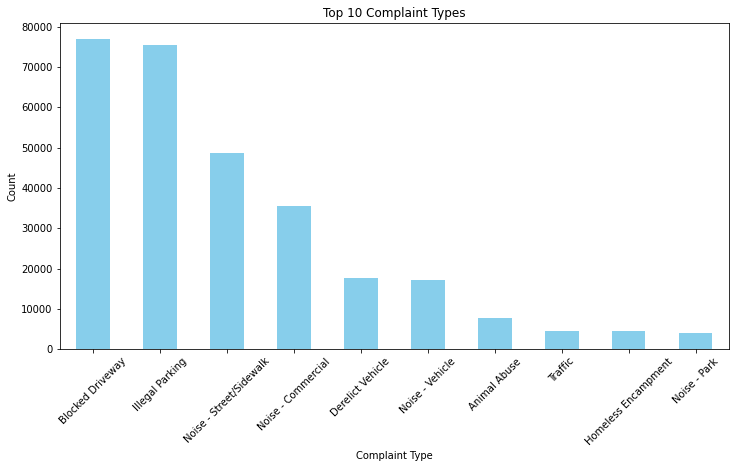

In [41]:
#3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
complaint_type_counts = dataframe['Complaint Type'].value_counts()
plt.figure(figsize=(12, 6))
complaint_type_counts[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [31]:
#4.Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.



dataframe['Created Date'] = pd.to_datetime(dataframe['Created Date'])
dataframe['Closed Date'] = pd.to_datetime(dataframe['Closed Date'])


dataframe['Request_Closing_Time'] = dataframe['Closed Date'] - dataframe['Created Date']


grouped = dataframe.groupby(['Location', 'Complaint Type'])['Request_Closing_Time'].mean().reset_index()


sorted_dataframe = grouped.sort_values(by=['Location', 'Request_Closing_Time'])


print(sorted_dataframe)


                                        Location           Complaint Type  \
0        (40.49913462101514, -74.24348482977875)          Illegal Parking   
1         (40.49967332981336, -74.2379063249761)         Derelict Vehicle   
2        (40.49994886080869, -74.23740031497493)          Illegal Parking   
3        (40.49999700116009, -74.23801175120917)          Illegal Parking   
4        (40.50002168207532, -74.23802262609722)          Illegal Parking   
...                                          ...                      ...   
151513   (40.91218391108232, -73.90075914042282)         Blocked Driveway   
151514   (40.91220586223159, -73.90075187169981)          Illegal Parking   
151515     (40.91234427543014, -73.902133732632)  Noise - Street/Sidewalk   
151517  (40.912868795316655, -73.90247305278565)          Noise - Vehicle   
151516  (40.912868795316655, -73.90247305278565)          Illegal Parking   

         Request_Closing_Time  
0             0 days 00:11:50  
1          

In [35]:
#5.Perform a statistical test Whether the average response time across complaint types is similar or not (overall)
#Are the type of complaint or service requested and location related?

complaint_groups = []


for complaint_type in dataframe['Complaint Type'].unique():
    complaint_group = dataframe[dataframe['Complaint Type'] == complaint_type]['Request_Closing_Time'].dropna()
    if not complaint_group.empty:
        complaint_groups.append(complaint_group)

#ANOVA test 
if len(complaint_groups) > 1:
    f_statistic, p_value = f_oneway(*complaint_groups)
    print("ANOVA p-value:", p_value)
else:
    print("Insufficient data for ANOVA test.")


# Creating a contingency table
contingency_table = pd.crosstab(dataframe['Complaint Type'], dataframe['Location'])


chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square p-value:", p)



ANOVA p-value: 0.0
Chi-Square p-value: 0.0
